# Goal
The goal of this notebook is to demonstrate and visualize the multi-objective optimization process.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [16]:
from mlos.OptimizerEvaluationTools.ObjectiveFunctionFactory import ObjectiveFunctionFactory, objective_function_config_store
from mlos.Optimizers.BayesianOptimizerFactory import BayesianOptimizerFactory
from mlos.Optimizers.OptimizationProblem import OptimizationProblem, Objective
from mlos.Spaces import ContinuousDimension


objective_function_config = objective_function_config_store.get_config_by_name("2d_hypersphere_minimize_some")
objective_function = ObjectiveFunctionFactory.create_objective_function(objective_function_config=objective_function_config)

# Let's craft the optimization problem.
#
parameter_space = objective_function.parameter_space
objective_space = objective_function.output_space
objective_space.add_dimension(ContinuousDimension(name="multiobjective_score", min=0, max=20))
optimization_problem = OptimizationProblem(
    parameter_space=parameter_space,
    objective_space=objective_space,
    objectives=[
        Objective(name="multiobjective_score", minimize=False),
        Objective(name="y0", minimize=False),
        Objective(name="y1", minimize=True)
    ]
)


optimizer_factory = BayesianOptimizerFactory()
optimizer = optimizer_factory.create_local_optimizer(
    optimization_problem=objective_function.default_optimization_problem
)

11/24/2020 00:49:02 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizerFactory.py:  37 -    create_local_optimizer() ] Optimizer config not specified. Using default.
11/24/2020 00:49:02 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizerFactory.py:  37 -    create_local_optimizer() ] Optimizer config not specified. Using default.
11/24/2020 00:49:02 -   BayesianOptimizerFactory -    INFO - [BayesianOptimizerFactory.py:  37 -    create_local_optimizer() ] Optimizer config not specified. Using default.


In [20]:
def optimize(optimizer, num_iterations):
    for _ in range(num_iterations):
        params = optimizer.suggest()
        objective_values = objective_function.evaluate_point(params)
        objective_values.multiobjective_score = abs(objective_values.y0) + abs(objective_values.y1)
        optimizer.register(params.to_dataframe(), objective_values.to_dataframe())

In [23]:
import matplotlib.pyplot as plt

def plot_pareto(optimizer):
    all_params_df, all_objectives_df, _ = optimizer.get_all_observations()
    pareto_params_df, pareto_objectives_df, _ = optimizer.pareto_frontier(objective_names=['y0', 'y1'])
    
    plt.figure(figsize=(5, 5))
    plt.scatter(all_objectives_df['y0'], all_objectives_df['y1'], label="all objectives")
    plt.scatter(pareto_objectives_df['y0'], pareto_objectives_df['y1'], label="pareto objectives")
    plt.plot(pareto_objectives_df['y0'], pareto_objectives_df['y1'], label="frontier line")
    plt.legend(loc="upper left")
    plt.ylabel('y1')
    plt.xlabel('y0')
    plt.show()

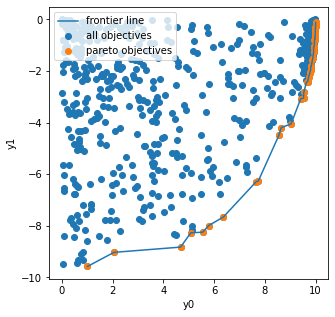

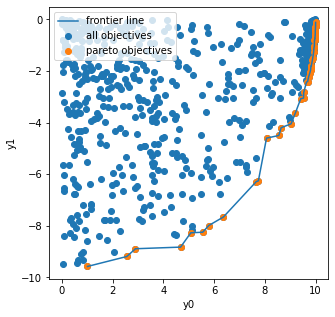

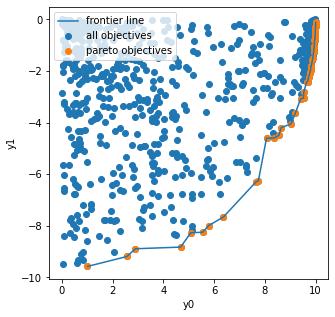

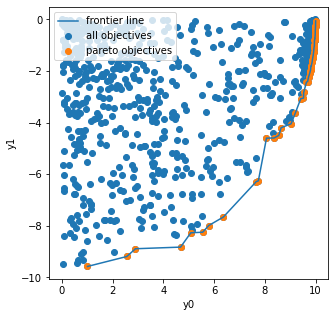

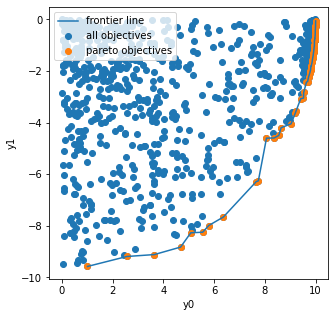

In [26]:
for i in range(5):
    optimize(optimizer, 100)
    plot_pareto(optimizer)